# Project 3

In this project, we will see the military expense of selected countries over years.

In [2]:
import pandas as pd

file_path = '/Users/User/Desktop/P_Popular Indicators (1)/6e33f2ce-9670-4af8-94be-742822d18827_Series - Metadata.csv'

# Try different encodings
encodings = ['utf-8', 'iso-8859-1', 'cp1252', 'latin1']

for encoding in encodings:
    try:
        wb_fdi = pd.read_csv(file_path, encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        print(wb_fdi.head())
        print(wb_fdi.info())
        break  # Exit the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
    except Exception as e:
        print(f"An error occurred with encoding {encoding}: {str(e)}")

Failed to read with encoding: utf-8
Successfully read the file with encoding: iso-8859-1
         Series Name  Series Code    Country Name Country Code 2000 [YR2000]  \
0  Population, total  SP.POP.TOTL     Afghanistan          AFG      19542982   
1  Population, total  SP.POP.TOTL         Albania          ALB       3089027   
2  Population, total  SP.POP.TOTL         Algeria          DZA      30774621   
3  Population, total  SP.POP.TOTL  American Samoa          ASM         58230   
4  Population, total  SP.POP.TOTL         Andorra          AND         66097   

  2001 [YR2001] 2002 [YR2002] 2003 [YR2003] 2004 [YR2004] 2005 [YR2005]  ...  \
0      19688632      21000256      22645130      23553551      24411191  ...   
1       3060173       3051010       3039616       3026939       3011487  ...   
2      31200985      31624696      32055883      32510186      32956690  ...   
3         58324         58177         57941         57626         57254  ...   
4         67820         70849 

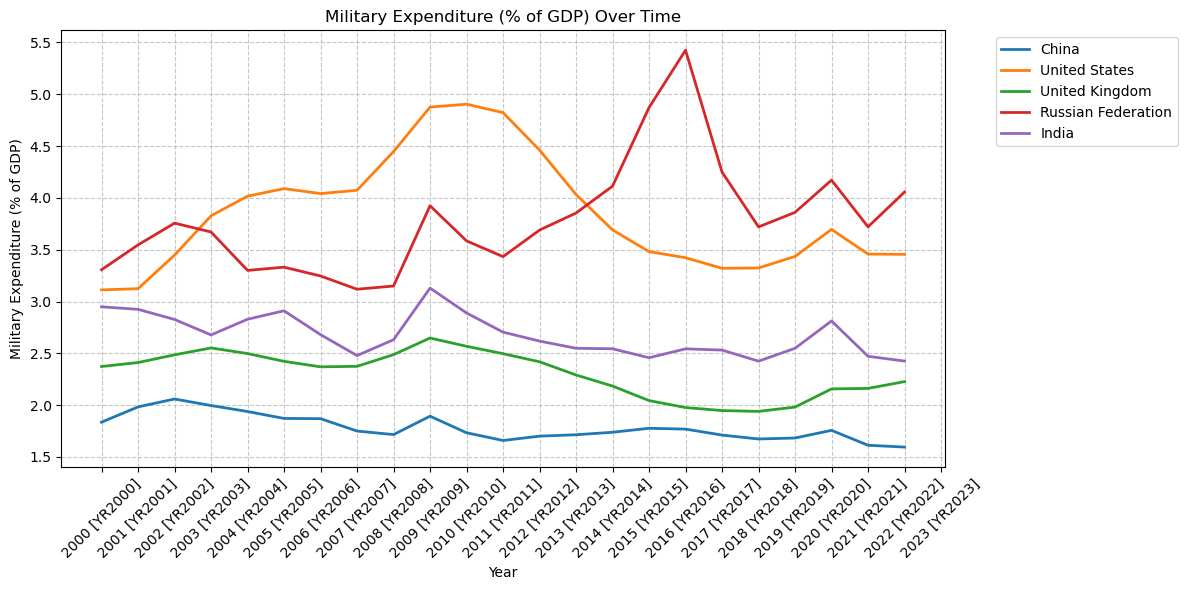

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define countries of interest
countries = ['China', 'United States', 'United Kingdom', 'Russian Federation','India']

# Read the data (assuming it's already loaded as wb_fdi)
# Filter for military expenditure data
military_data = wb_fdi[wb_fdi['Series Name'] == 'Military expenditure (% of GDP)']

# Create figure
plt.figure(figsize=(12, 6))

# Plot data for each country
for country in countries:
    # Filter data for current country
    country_data = military_data[military_data['Country Name'] == country]
    
    if not country_data.empty:
        # Get year columns (assuming they start from column index 4)
        year_columns = military_data.columns[4:]
        
        # Convert values to numeric, handling any non-numeric values
        values = pd.to_numeric(country_data.iloc[0, 4:], errors='coerce')
        
        # Plot the data
        plt.plot(year_columns, values, label=country, linewidth=2)

# Customize the plot
plt.title('Military Expenditure (% of GDP) Over Time')
plt.xlabel('Year')
plt.ylabel('Military Expenditure (% of GDP)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()